In [ ]:
%matplotlib inline


# Data Browser


Connecting data between multiple canvases.

This example covers how to interact data with multiple canvases. This
let's you select and highlight a point on one axis, and generating the
data of that point on the other axis.



In [1]:
import numpy as np


class PointBrowser(object):
    """
    Click on a point to select and highlight it -- the data that
    generated the point will be shown in the lower axes.  Use the 'n'
    and 'p' keys to browse through the next and previous points
    """

    def __init__(self):
        self.lastind = 0

        self.text = ax.text(0.05, 0.95, 'selected: none',
                            transform=ax.transAxes, va='top')
        self.selected, = ax.plot([xs[0]], [ys[0]], 'o', ms=12, alpha=0.4,
                                 color='yellow', visible=False)

    def onpress(self, event):
        if self.lastind is None:
            return
        if event.key not in ('n', 'p'):
            return
        if event.key == 'n':
            inc = 1
        else:
            inc = -1

        self.lastind += inc
        self.lastind = np.clip(self.lastind, 0, len(xs) - 1)
        self.update()

    def onpick(self, event):

        if event.artist != line:
            return True

        N = len(event.ind)
        if not N:
            return True

        # the click locations
        x = event.mouseevent.xdata
        y = event.mouseevent.ydata

        distances = np.hypot(x - xs[event.ind], y - ys[event.ind])
        indmin = distances.argmin()
        dataind = event.ind[indmin]

        self.lastind = dataind
        self.update()

    def update(self):
        if self.lastind is None:
            return

        dataind = self.lastind

        ax2.cla()
        ax2.plot(X[dataind])

        ax2.text(0.05, 0.9, 'mu=%1.3f\nsigma=%1.3f' % (xs[dataind], ys[dataind]),
                 transform=ax2.transAxes, va='top')
        ax2.set_ylim(-0.5, 1.5)
        self.selected.set_visible(True)
        self.selected.set_data(xs[dataind], ys[dataind])

        self.text.set_text('selected: %d' % dataind)
        fig.canvas.draw()



[ 0.29468706  0.29409688  0.28606434  0.28179843  0.28473045  0.27804844
  0.27978164  0.28368199  0.30015027  0.27421288  0.28640286  0.29604942
  0.291209    0.28171482  0.28784203  0.28604495  0.28069942  0.29056111
  0.27607444  0.28096068  0.29721276  0.29670587  0.29379024  0.29543302
  0.27529902  0.28927197  0.29859506  0.30358907  0.29624862  0.27660658
  0.27540796  0.29607883  0.30452444  0.30755232  0.28907281  0.2853224
  0.29351306  0.27415399  0.29216742  0.27814979  0.29311946  0.28906271
  0.28815912  0.29552643  0.29444815  0.29317837  0.28823363  0.28634837
  0.28721897  0.26574684  0.28257051  0.2854511   0.28222985  0.29807154
  0.30111727  0.28810082  0.29901176  0.27827353  0.27617661  0.2758873
  0.2973191   0.27825282  0.28292636  0.27600956  0.27555896  0.28412305
  0.28295432  0.3007283   0.28938474  0.26740576  0.28231424  0.28762714
  0.27441958  0.28960032  0.3019749   0.29948083  0.29009822  0.2773657
  0.28798881  0.27829172  0.28345532  0.29391598  0.30

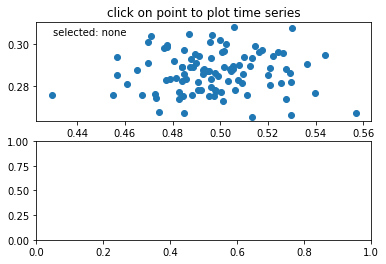

In [18]:

if __name__ == '__main__':
    import matplotlib.pyplot as plt
    # Fixing random state for reproducibility
    np.random.seed(19680801)

    X = np.random.rand(100, 200)
    xs = np.mean(X, axis=1)  #列 平均
    ys = np.std(X, axis=1)   #列 标准差
    print(ys)
    fig, (ax, ax2) = plt.subplots(2, 1)
    ax.set_title('click on point to plot time series')
    line, = ax.plot(xs, ys, 'o', picker=5)  # 5 points tolerance

    browser = PointBrowser()

    fig.canvas.mpl_connect('pick_event', browser.onpick)
    fig.canvas.mpl_connect('key_press_event', browser.onpress)

    plt.show()

In [3]:
np.random.seed(19680801)


In [21]:
X = np.random.rand(3, 2)

In [22]:
X

array([[ 0.08311801,  0.73319959],
       [ 0.32291872,  0.44917166],
       [ 0.06297392,  0.87516129]])

In [24]:
X[2]

array([ 0.06297392,  0.87516129])

In [6]:
print(X.shape)

(100, 200)


In [16]:
    xs = np.mean(X, axis=0)
    ys = np.std(X, axis=1)

In [17]:
xs

array([ 0.58655862,  0.62298823])

In [15]:
ys

array([ 0.09598264,  0.06403974,  0.10537796])

In [19]:
X

array([[  7.00367304e-01,   7.42750809e-01,   7.09280011e-01, ...,
          7.93417248e-01,   8.87228119e-01,   1.13490964e-01],
       [  8.94279856e-02,   7.52063348e-02,   5.88670132e-01, ...,
          8.86641145e-01,   5.98318272e-01,   6.88305822e-01],
       [  5.76446337e-01,   9.61992234e-01,   3.80434503e-01, ...,
          4.18053065e-01,   5.56830190e-02,   5.69258261e-01],
       ..., 
       [  8.72741873e-01,   7.43774262e-01,   3.46924233e-01, ...,
          8.07798621e-01,   3.99350643e-01,   6.57808545e-04],
       [  8.81415689e-01,   6.06768575e-01,   7.10687907e-01, ...,
          6.53458171e-01,   9.68434368e-02,   6.88656935e-02],
       [  8.31048234e-01,   6.78693622e-01,   9.54814127e-01, ...,
          7.55410408e-01,   2.52890887e-01,   4.02944822e-01]])